# Notebook 2: Causal Relativistic Fluids - The Israel-Stewart Theory as a Relativistic LNS

**Series:** From LNS to Einstein's Universe: A Framework for Relativistic Fluid Dynamics

## Introduction: Curing the Pathologies of First-Order Theories

In Notebook 1, we established the definitive failure of first-order relativistic fluid theories like Eckart and Landau-Lifshitz. Their direct generalization of classical Navier-Stokes constitutive relations led to unphysical superluminal signals (acausality) and inherent instabilities. This breakdown demonstrates that a more sophisticated approach is not just an improvement, but a necessity.

The solution, pioneered by Müller, Israel, and Stewart, is to abandon the assumption of instantaneous dissipative response. This is precisely the **Local Navier-Stokes (LNS) philosophy** applied in a relativistic context. By treating the dissipative fluxes—heat flux $q^\mu$ and viscous stress $\pi^{\mu\nu}$—as independent, dynamic fields with finite relaxation times, we can construct a theory that is both causal and stable.

This notebook will:
1.  Introduce the concept of **second-order theories** based on an expanded definition of entropy that includes out-of-equilibrium terms.
2.  Derive the structure of the **Israel-Stewart equations**, which are relaxational, hyperbolic evolution equations for the dissipative fluxes.
3.  Highlight the direct structural analogy between the Israel-Stewart equations and the LNS model we developed for non-relativistic fluids.
4.  Outline the implementation strategy for a 1+1D causal relativistic hydrodynamics solver.

## 1. The Foundation: Non-Equilibrium Entropy and the Second Law

The key insight of Israel and Stewart was to start from a more general definition of the entropy four-current, $S^\mu$. In local thermodynamic equilibrium, $S^\mu_{eq} = s u^\mu$, where $s$ is the equilibrium entropy density. The Israel-Stewart approach posits that when the fluid is out of equilibrium, the entropy current must include contributions from the dissipative fluxes themselves:
$$S^\mu = s u^\mu - \frac{1}{T} q^\mu - \frac{1}{2T} (\beta_0 p_\text{bulk}^2 u^\mu + \beta_1 q_\alpha q^\alpha u^\mu + \beta_2 \pi_{\alpha\beta}\pi^{\alpha\beta} u^\mu) + \dots$$
Here, $p_\text{bulk}$ is the bulk viscous pressure (related to $\text{tr}(\pi^{\mu\nu})$), and $\beta_0, \beta_1, \beta_2$ are new thermodynamic coefficients related to the second-order deviations from equilibrium. For simplicity, we will focus on shear stress $\pi^{\mu\nu}$ and heat flux $q^\mu$.

The central physical principle is the **Second Law of Thermodynamics**, which demands that the divergence of the entropy current (the rate of entropy production) must be non-negative:
$$\partial_\mu S^\mu \ge 0$$

By substituting the full expression for $S^\mu$ and the conservation laws ($\partial_\mu T^{\mu\nu} = 0$, $\partial_\mu (n u^\mu)=0$ for particle number $n$) into the entropy inequality, one can derive constraints on the evolution of $q^\mu$ and $\pi^{\mu\nu}$. Instead of being simple algebraic relations, they must now be **dynamic evolution equations** that guarantee a positive entropy production.

## 2. The Israel-Stewart Equations: A Relativistic LNS Framework

The procedure described above leads to a set of relaxational evolution equations for the dissipative fluxes. These are the Israel-Stewart equations. Let's present their structure, highlighting the direct analogy to our non-relativistic LNS model.

**1. Evolution of the Shear Stress Tensor $\pi^{\mu\nu}$:**
$$\tau_\pi \Delta^{\mu\nu}_{\alpha\beta} u^\gamma \partial_\gamma \pi^{\alpha\beta} + \pi^{\mu\nu} = 2\eta \sigma^{\mu\nu} + \text{coupling terms}$$

Let's break this down:
*   $\tau_\pi$: This is the **shear stress relaxation time**. It's the relativistic equivalent of our $\tau_\sigma$. It's a fundamental material property.
*   $\Delta^{\mu\nu}_{\alpha\beta} u^\gamma \partial_\gamma \pi^{\alpha\beta}$: This is a properly constructed **objective time derivative** of the stress tensor. The $u^\gamma \partial_\gamma$ part is the convective derivative along the fluid flow lines, and the projector tensors $\Delta^{\mu\nu}_{\alpha\beta}$ ensure the result remains properly spatial and symmetric in the fluid rest frame. This is the relativistic analogue of $\frac{\mathcal{D}_\sigma \mathbf{\sigma}'}{\mathcal{D} t}$.
*   $+\pi^{\mu\nu}$: This is the simple relaxation term.
*   $2\eta \sigma^{\mu\nu}$: This is the **driving term**, perfectly analogous to the Newtonian stress $\mathbf{\sigma}'_{NSF}$. Here, $\eta$ is the shear viscosity and $\sigma^{\mu\nu}$ is the relativistic rate-of-shear tensor, built from gradients of the four-velocity $u^\mu$.
*   `coupling terms`: The full theory includes higher-order terms that couple the evolution of shear stress to heat flux, vorticity, etc. (e.g., terms like $\pi^{\mu\gamma} \omega_\gamma^{\ \nu}$). For many applications, these are secondary.

**2. Evolution of the Heat Flux Vector $q^\mu$:**
$$\tau_q \Delta^{\mu}_{\nu} u^\gamma \partial_\gamma q^\nu + q^\mu = -k (g^{\mu\nu} - u^\mu u^\nu) (\partial_\nu T - T u^\beta \partial_\beta u_\nu) + \text{coupling terms}$$

The analogy is again direct:
*   $\tau_q$: The **thermal relaxation time**.
*   $\Delta^{\mu}_{\nu} u^\gamma \partial_\gamma q^\nu$: The objective time derivative for the heat flux vector.
*   $+q^\mu$: The relaxation term.
*   $-k(\dots)$: The driving term, which is the relativistic generalization of Fourier's law ($-k \nabla T$).

**The LNS Connection is Unmistakable:**
The Israel-Stewart equations are precisely a relativistic formulation of the LNS philosophy. They transform the fluid dynamics problem into a larger system of first-order, hyperbolic, causal equations for the state vector:
$$\mathbf{Q} = (\text{e.g., } n, T, u^\mu, q^\mu, \pi^{\mu\nu})$$
The result is a theory that is well-posed, causal (disturbances propagate at or below the speed of light), and stable around equilibrium.

d:\Conda\chem\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


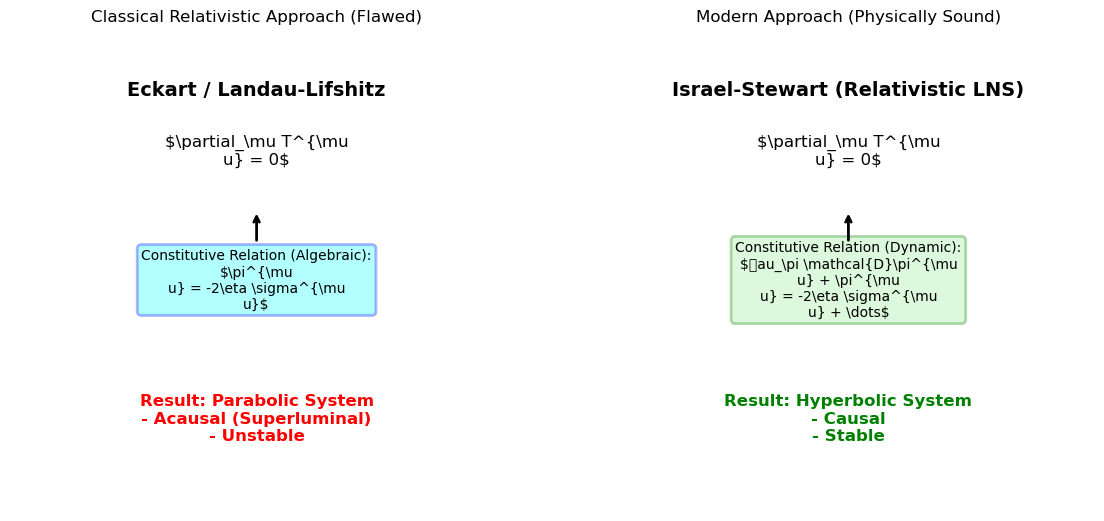

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_theory_comparison():
    """Generates a conceptual diagram comparing the theories."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Eckart / Landau-Lifshitz (First-Order Theory)
    ax1.text(0.5, 0.9, 'Eckart / Landau-Lifshitz', ha='center', fontsize=14, weight='bold')
    ax1.text(0.5, 0.75, '$\partial_\mu T^{\mu\nu} = 0$', ha='center', fontsize=12)
    ax1.text(0.5, 0.5, 'Constitutive Relation (Algebraic):\n$\pi^{\mu\nu} = -2\eta \sigma^{\mu\nu}$', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", fc="cyan", ec="b", lw=2, alpha=0.3))
    ax1.annotate('', xy=(0.5, 0.65), xytext=(0.5, 0.58), arrowprops=dict(arrowstyle="->", lw=2))
    ax1.text(0.5, 0.2, 'Result: Parabolic System\n- Acausal (Superluminal)\n- Unstable', ha='center', va='center', color='red', fontsize=12, weight='bold')
    ax1.set_xlim(0, 1); ax1.set_ylim(0, 1); ax1.axis('off')
    ax1.set_title('Classical Relativistic Approach (Flawed)', pad=20)

    # Israel-Stewart / LNS (Second-Order Theory)
    ax2.text(0.5, 0.9, 'Israel-Stewart (Relativistic LNS)', ha='center', fontsize=14, weight='bold')
    ax2.text(0.5, 0.75, '$\partial_\mu T^{\mu\nu} = 0$', ha='center', fontsize=12)
    ax2.text(0.5, 0.5, 'Constitutive Relation (Dynamic):\n$\tau_\pi \mathcal{D}\pi^{\mu\nu} + \pi^{\mu\nu} = -2\eta \sigma^{\mu\nu} + \dots$', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", ec="g", lw=2, alpha=0.3))
    ax2.annotate('', xy=(0.5, 0.65), xytext=(0.5, 0.58), arrowprops=dict(arrowstyle="->", lw=2))
    ax2.text(0.5, 0.2, 'Result: Hyperbolic System\n- Causal\n- Stable', ha='center', va='center', color='green', fontsize=12, weight='bold')
    ax2.set_xlim(0, 1); ax2.set_ylim(0, 1); ax2.axis('off')
    ax2.set_title('Modern Approach (Physically Sound)', pad=20)

    plt.show()
    
plot_theory_comparison()

## 3. Implementation Strategy for a 1+1D Relativistic LNS Solver

Implementing a solver for the Israel-Stewart equations is a significant task. Let's outline the strategy for a simplified 1+1D (one spatial dimension, one time dimension) case in flat Minkowski spacetime.

**1. Choice of Variables:**
It is often numerically advantageous to evolve primitive variables in the **local rest frame** of the fluid, and then Lorentz boost them to the lab frame when needed. A common choice for the state vector to be evolved is:
$$\mathbf{W} = (n, T, u^x, q^x, \pi^{xx})$$
where quantities are defined in the fluid rest frame. Alternatively, one can evolve the lab-frame conserved quantities (like $T^{00}, T^{0x}$) but the conversion back to primitive variables can be complex.

**2. System of Equations in 1+1D:**
The full set of equations must be written out explicitly in terms of the chosen variables. This involves:
*   The conservation laws $\partial_\mu T^{\mu 0}=0$ (energy) and $\partial_\mu T^{\mu 1}=0$ (momentum).
*   The particle number conservation $\partial_\mu (n u^\mu)=0$.
*   The Israel-Stewart relaxation equations for $q^x$ and $\pi^{xx}$.
This results in a system of first-order hyperbolic PDEs of the form $\partial_t \mathbf{W} + \mathbf{A}(\mathbf{W}) \partial_x \mathbf{W} = \mathbf{S}(\mathbf{W})$.

**3. Numerical Scheme (Relativistic High-Resolution Godunov-Type):**
The core numerical machinery is similar to what we developed for the non-relativistic LNS, but with crucial relativistic modifications:
*   **Riemann Solvers:** An approximate Riemann solver (like HLL or HLLC) is needed, but it must operate on the relativistic equations. The wave speed estimates $S_L, S_R$ must account for the Lorentz factor and the speed of light, ensuring they never exceed $\pm c$.
*   **State Variable Conversion:** Robust routines are needed to convert between conserved variables (in the lab frame) and primitive variables (in the fluid rest frame). This involves solving a non-linear equation to find the Lorentz factor $\gamma$ from the conserved quantities.
*   **Flux Calculation:** Fluxes must be computed in the lab frame.
*   **Source Terms:** The Israel-Stewart source terms must be implemented carefully.

**4. Code Structure (Conceptual):**
A typical relativistic hydro code would have modules for:
*   **EOS Handler:** Manages the Equation of State ($p(\epsilon, n)$).
*   **Variable Converter:** Switches between lab-frame conserved and rest-frame primitive variables.
*   **Riemann Solver:** Computes numerical fluxes at cell interfaces.
*   **Source Term Calculator:** Implements the Israel-Stewart relaxation terms.
*   **Time-Stepping Loop:** The main driver, implementing a high-order scheme like SSP-RK2 or RK3, subject to a relativistic CFL condition.

In [1]:
def conceptual_relativistic_solver_structure():
    """Outlines the high-level steps in a relativistic LNS (Israel-Stewart) solver."""
    
    # 1. Initialization
    # grid = setup_grid(Nx, Lx)
    # W_primitive = set_initial_conditions(grid) # e.g., for a shock tube
    # Q_conserved_lab = convert_primitive_to_conserved_relativistic(W_primitive)
    
    # t = 0
    # while t < t_final:
    #     # 2. Determine Time Step
    #     # dt = calculate_dt_relativistic_cfl(Q_conserved_lab)
    #
    #     # 3. Main Update (e.g., RK stage)
    #     # --- Compute RHS L(Q) ---
    #     # a. Reconstruct interface states from cell-averages (MUSCL)
    #     W_L, W_R = reconstruct_muscl_relativistic(Q_conserved_lab)
    #     
    #     # b. Compute numerical fluxes at interfaces using Riemann solver
    #     F_hat = hllc_relativistic_solver(W_L, W_R)
    #     
    #     # c. Compute source terms (Israel-Stewart relaxation)
    #     S = calculate_israel_stewart_source_terms(Q_conserved_lab)
    #     
    #     # d. Assemble RHS = -div(F_hat) + S
    #     rhs = assemble_rhs(F_hat, S, grid)
    #     
    #     # 4. Update state vector
    #     Q_conserved_lab = update_state(Q_conserved_lab, rhs, dt)
    #     
    #     # t += dt
    
    print("Conceptual structure of a relativistic LNS/Israel-Stewart solver defined.")
    print("Key challenges: variable conversions, Lorentz boosts, and a fully relativistic Riemann solver.")

conceptual_relativistic_solver_structure()

Conceptual structure of a relativistic LNS/Israel-Stewart solver defined.
Key challenges: variable conversions, Lorentz boosts, and a fully relativistic Riemann solver.


## 4. Conclusion: The Universal Necessity of the LNS Design Philosophy

This notebook has demonstrated that the LNS philosophy—elevating dissipative fluxes to dynamic variables with finite relaxation times to create a hyperbolic system—is not just an improvement for non-relativistic fluid dynamics, but an **absolute necessity** for constructing a physically viable theory of dissipative relativistic fluids.

**Key Takeaways:**
*   The direct generalization of Navier-Stokes into relativity (Eckart, Landau-Lifshitz) is a failed theory due to acausality and instability.
*   The successful cure, the **Israel-Stewart theory**, is a direct relativistic analogue of the LNS framework, built on the same principles of non-equilibrium thermodynamics and dynamic, relaxational fluxes.
*   This establishes the LNS design principle as a **universal and fundamental requirement** for building consistent theories of dissipative media that operate near their physical limits, whether those limits are set by molecular relaxation times or the speed of light.

**Next Steps:**
In the final notebook of this series, we will apply these concepts by conceptually simulating a relativistic shock tube and discussing the application of these causal theories to modeling the quark-gluon plasma created in heavy-ion collisions—one of the most extreme and fascinating fluids known to physics.